In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file  = r'D:\EDA\Files\ipl_2022_dataset.csv'

In [3]:
df = pd.read_csv(file)
df.sample(5)

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
543,543,Ravi Sharma,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
25,25,Moeen Ali,Retained,ALL-ROUNDER,8.00,1040.0,CSK,Chennai Super Kings
124,124,Jason Holder,1.5 Cr,ALL-ROUNDER,8.75,1137.5,SRH,Lucknow Super Giants
603,603,Mickil Jaiswal,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold
243,243,Mujeeb Zadran,2 Cr,BOWLER,NaN,NaN,SRH,Unsold


C:\Users\sadhi\AppData\Local\Temp\ipykernel_14552\1941750232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['COST IN ₹ (CR.)'])


<AxesSubplot: xlabel='COST IN ₹ (CR.)', ylabel='Density'>

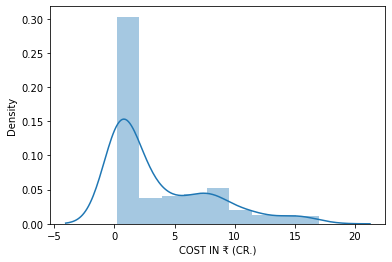

In [4]:
sns.distplot(df['COST IN ₹ (CR.)'])

<AxesSubplot: >

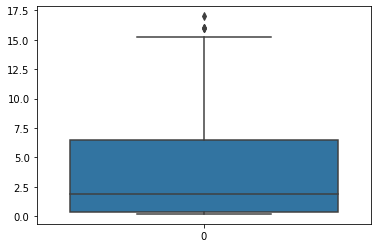

In [5]:
sns.boxplot(df['COST IN ₹ (CR.)'])

In [6]:
df.describe()

,Unnamed: 0,COST IN ₹ (CR.),Cost IN $ (000)
count,633.000000,237.000000,237.000000
mean,316.000000,3.695781,480.451477
std,182.875641,4.238092,550.951945
min,0.000000,0.200000,26.000000
25%,158.000000,0.400000,52.000000
50%,316.000000,1.900000,247.000000
75%,474.000000,6.500000,845.000000
max,632.000000,17.000000,2210.000000


In [7]:
df.isnull().sum()

Unnamed: 0           0
Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [9]:
#Observation
#1)Only the columns Base Price,COST IN ₹ (CR.),Cost IN $ (000) are numerical rest all are categorical

In [10]:
df.shape

(633, 8)

In [11]:
team = df.groupby('Team').size().reset_index().rename(columns={0:'Count'})
team

,Team,Count
0,Chennai Super Kings,25
1,Delhi Capitals,24
2,Gujarat Titans,22
3,Kolkata Knight Riders,25
4,Lucknow Super Giants,22
5,Mumbai Indians,25
6,Punjab Kings,25
7,Rajasthan Royals,24
8,Royal Challengers Bangalore,22
9,Sunrisers Hyderabad,23


<BarContainer object of 11 artists>

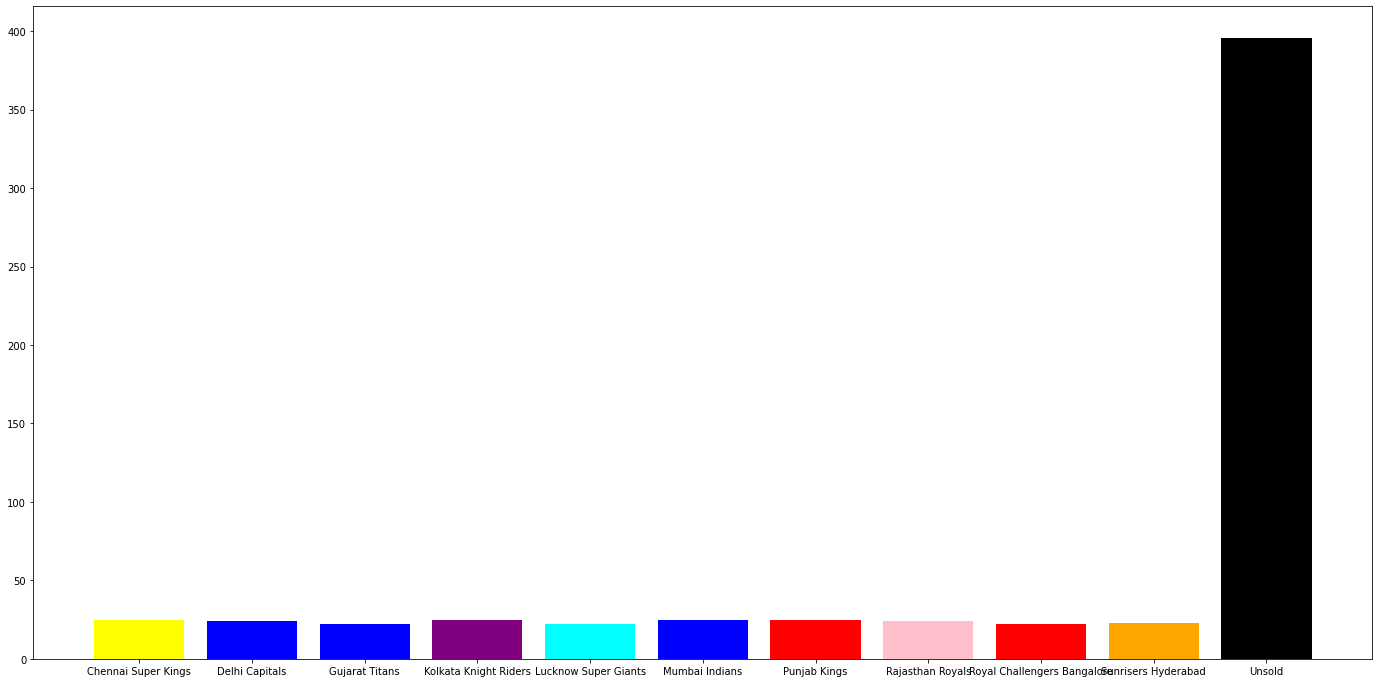

In [12]:
plt.rcParams['figure.figsize'] = (24,12)
colos = ['yellow','blue', 'blue','purple', 'cyan','blue','red','pink','red','orange','black']
plt.bar(team['Team'],height = team['Count'],color = colos)

<AxesSubplot: ylabel='Team'>

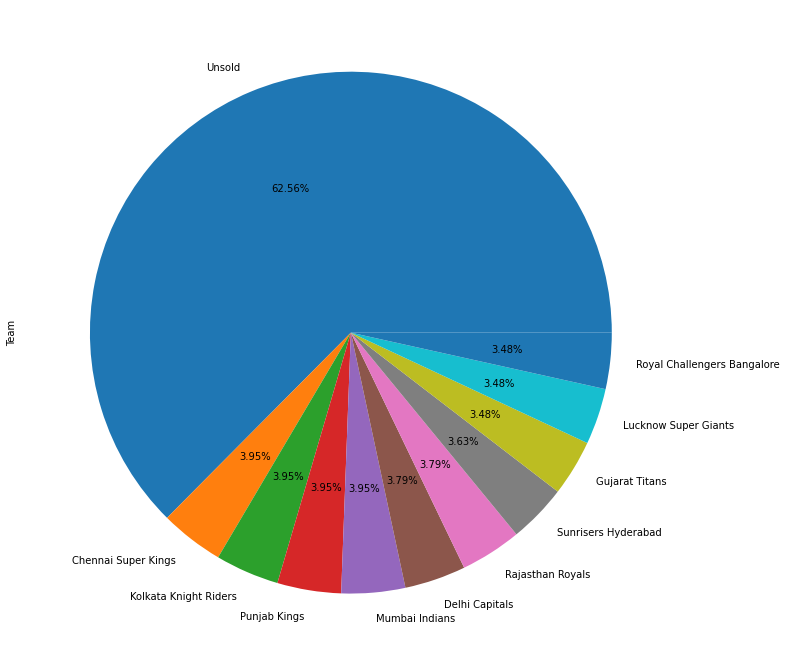

In [13]:
plt.rcParams['figure.figsize'] = (12,12)
df['Team'].value_counts().plot(kind = 'pie', autopct = "%.2f%%",labels = df.Team.value_counts().index)

In [14]:
#OBSERVATOION
#From the above figures we observe that-
#a)62.56% Players are Unsold i.e 396 player
#b)Rest all the players are divided into teams in a the range of (3.48%-3.95%)ie(22-25)


In [15]:
df.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,33
1,1.5 Cr,20
2,2 Cr,48
3,20 Lakh,344
4,30 Lakh,9
5,40 Lakh,16
6,50 Lakh,104
7,75 Lakh,26
8,Draft Pick,6
9,Retained,27


In [16]:
#Ovservation
# 1) 27 Players are retained by teams
# 2) 6 Players are Draft Pick

In [17]:
P = df.groupby('TYPE').size().reset_index().rename(columns={0:'Count'})
P

,TYPE,Count
0,ALL-ROUNDER,242
1,BATTER,112
2,BOWLER,215
3,WICKETKEEPER,64


<BarContainer object of 4 artists>

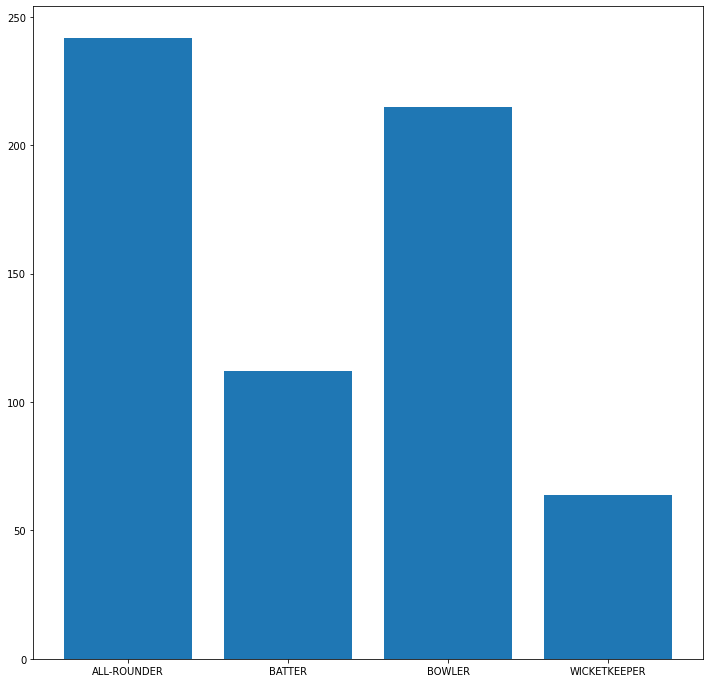

In [18]:
plt.bar(x = P['TYPE'], height = P['Count'])

In [19]:
P1 = df[df['Team']!='Unsold']
P1.sample(5)

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
177,177,Shahbaz Ahamad,30 Lakh,ALL-ROUNDER,2.40,312.0,RCB,Royal Challengers Bangalore
60,60,Kamlesh Nagarkoti,40 Lakh,ALL-ROUNDER,1.10,143.0,KKR,Delhi Capitals
144,144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings
153,153,Murugan Ashwin,20 Lakh,BOWLER,1.60,208.0,PBKS,Mumbai Indians


C:\Users\sadhi\AppData\Local\Temp\ipykernel_14552\4042892302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(P1['COST IN ₹ (CR.)'])


<AxesSubplot: xlabel='COST IN ₹ (CR.)', ylabel='Density'>

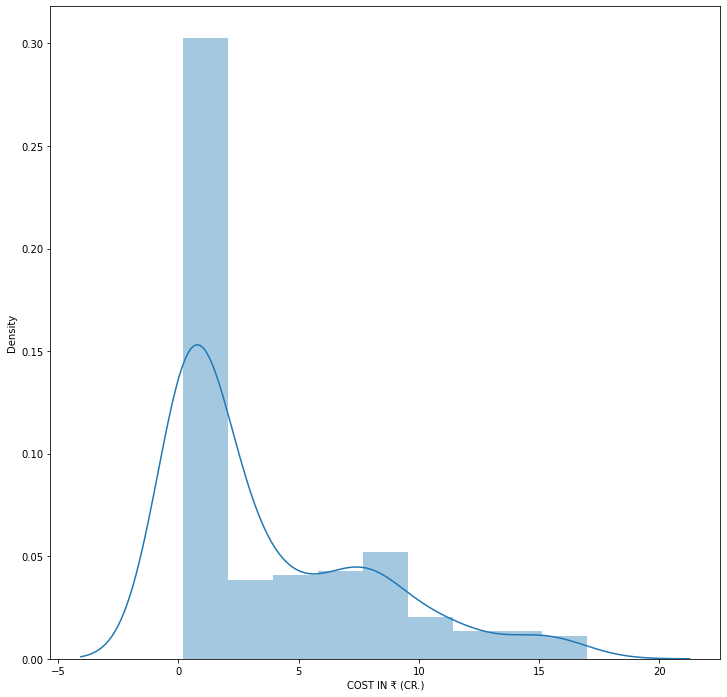

In [20]:
sns.distplot(P1['COST IN ₹ (CR.)'])

<AxesSubplot: >

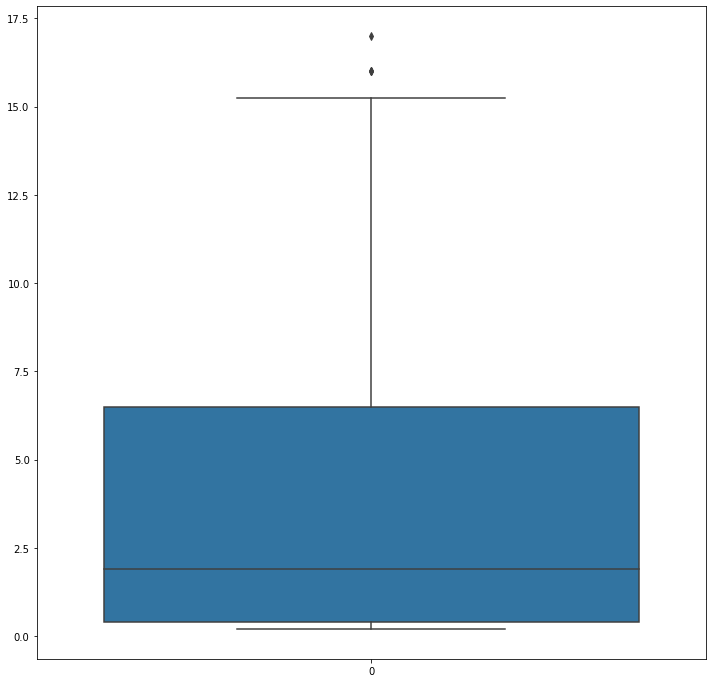

In [21]:
sns.boxplot(P1['COST IN ₹ (CR.)'])

In [22]:
P1.groupby('Team').size().reset_index().rename(columns={0:'Count'})

,Team,Count
0,Chennai Super Kings,25
1,Delhi Capitals,24
2,Gujarat Titans,22
3,Kolkata Knight Riders,25
4,Lucknow Super Giants,22
5,Mumbai Indians,25
6,Punjab Kings,25
7,Rajasthan Royals,24
8,Royal Challengers Bangalore,22
9,Sunrisers Hyderabad,23


In [23]:
P2 = P1.groupby('TYPE').size().reset_index().rename(columns={0:'Count'})
P2

,TYPE,Count
0,ALL-ROUNDER,88
1,BATTER,45
2,BOWLER,77
3,WICKETKEEPER,27


<AxesSubplot: ylabel='Team'>

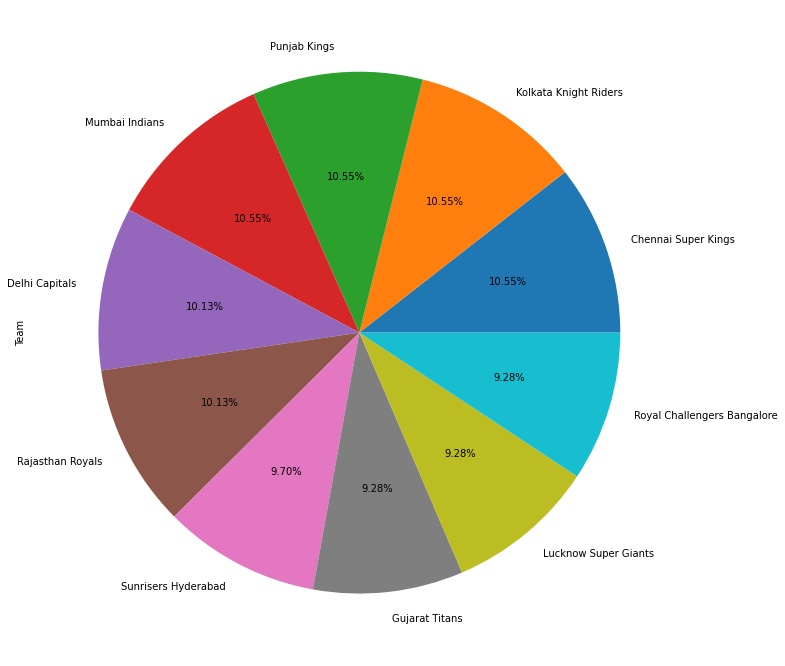

In [24]:
P1['Team'].value_counts().plot(kind = 'pie', autopct = "%.2f%%",labels = P1.Team.value_counts().index)

In [25]:
#Observation
#a)Above pie chart shows the distribution of players bought by the teams.

In [26]:
P2.sum()

TYPE     ALL-ROUNDERBATTERBOWLERWICKETKEEPER
Count                                    237
dtype: object

In [27]:
df.count()


Unnamed: 0         633
Player             633
Base Price         633
TYPE               633
COST IN ₹ (CR.)    237
Cost IN $ (000)    237
2021 Squad         199
Team               633
dtype: int64

In [172]:
P1.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
Team,,
Chennai Super Kings,87.05,25
Delhi Capitals,86.40,24
Gujarat Titans,89.65,22
Kolkata Knight Riders,81.55,25
Lucknow Super Giants,89.40,22
Mumbai Indians,89.90,25
Punjab Kings,84.55,25
Rajasthan Royals,89.05,24
Royal Challengers Bangalore,88.45,22


<BarContainer object of 4 artists>

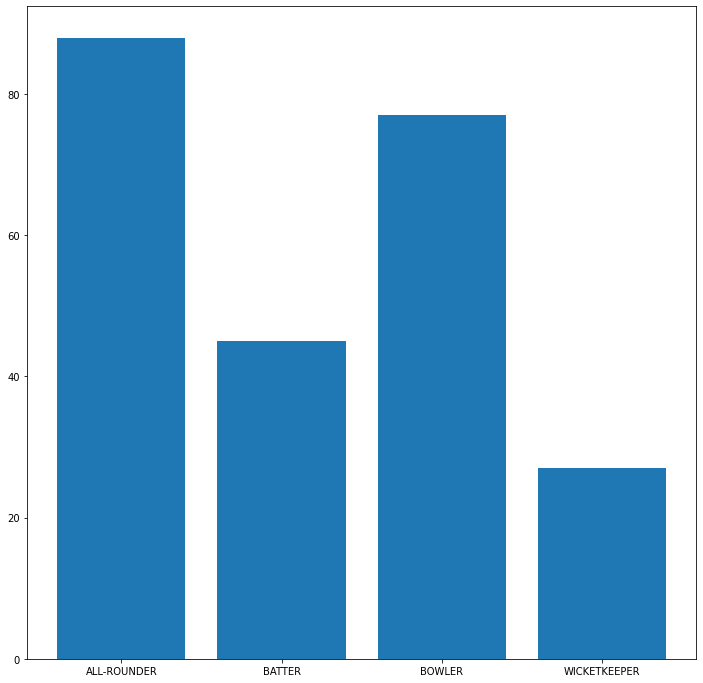

In [28]:
plt.bar(x = P2['TYPE'],height = P2['Count'])

In [29]:
# OBSERVATION
# a)88 All rounders were sold out of 242 i.e 36.36%.
# b)45 Batters were sold out of 112 i.e 40.17%.
# c)77 Bowlers were sold out of 215 i.e 35.81%.
# d)27 Wicket Keepers were sold out of 64 i.e 42.18 %.
#WE infer that Wicket Keepers has the highest percentage of getting sold.

All - Rounders

In [30]:
AR = P1.loc[P1['TYPE']=='ALL-ROUNDER']
AR.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
14,14,Jayant Yadav,1 Cr,ALL-ROUNDER,1.7,221.0,MI,Gujarat Titans
15,15,Vijay Shankar,50 Lakh,ALL-ROUNDER,1.4,182.0,SRH,Gujarat Titans
16,16,Dominic Drakes,75 Lakh,ALL-ROUNDER,1.1,143.0,CSK,Gujarat Titans


In [164]:
AR['COST IN ₹ (CR.)'].sum()

317.34999999999997

In [165]:
AR['COST IN ₹ (CR.)'].mean()

3.6062499999999997

In [166]:
AR['COST IN ₹ (CR.)'].std()

4.028253753749595

In [31]:
AR.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
Team,,
Chennai Super Kings,40.10,9
Delhi Capitals,18.85,9
Gujarat Titans,29.10,8
Kolkata Knight Riders,50.40,10
Lucknow Super Giants,33.95,9
Mumbai Indians,28.70,11
Punjab Kings,34.05,11
Rajasthan Royals,11.45,6
Royal Challengers Bangalore,39.35,9


<AxesSubplot: xlabel='Team'>

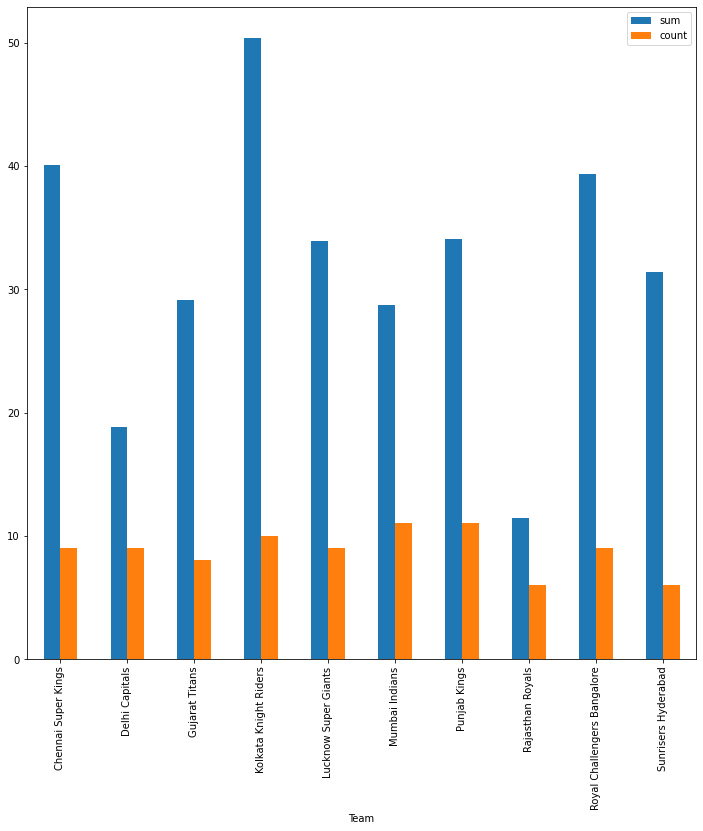

In [32]:
cl1 = ['yellow','blue','blue','purple','cyan','blue','red','pink','red','orange']
AR.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')



In [33]:
#Observation
#a)Maximum number of all rounders are bought by 2 teams Mumbai Indians and Punjab Kings i.e 11 all rounders
#b)Maximum money spent on all rounder is by Chennai Super kings that is 40.10 cr.

Batters

In [34]:
BT = P1.loc[P1['TYPE']=='BATTER']

In [168]:
BT['COST IN ₹ (CR.)'].sum()

184.84999999999997

In [170]:
BT['COST IN ₹ (CR.)'].mean()

4.107777777777777

In [171]:
BT['COST IN ₹ (CR.)'].std()

4.5009336854039566

In [35]:
BT.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
Team,,
Chennai Super Kings,9.40,5
Delhi Capitals,17.85,5
Gujarat Titans,15.60,4
Kolkata Knight Riders,16.10,7
Lucknow Super Giants,6.80,3
Mumbai Indians,27.40,5
Punjab Kings,20.75,3
Rajasthan Royals,22.65,5
Royal Challengers Bangalore,22.80,3


<AxesSubplot: xlabel='Team'>

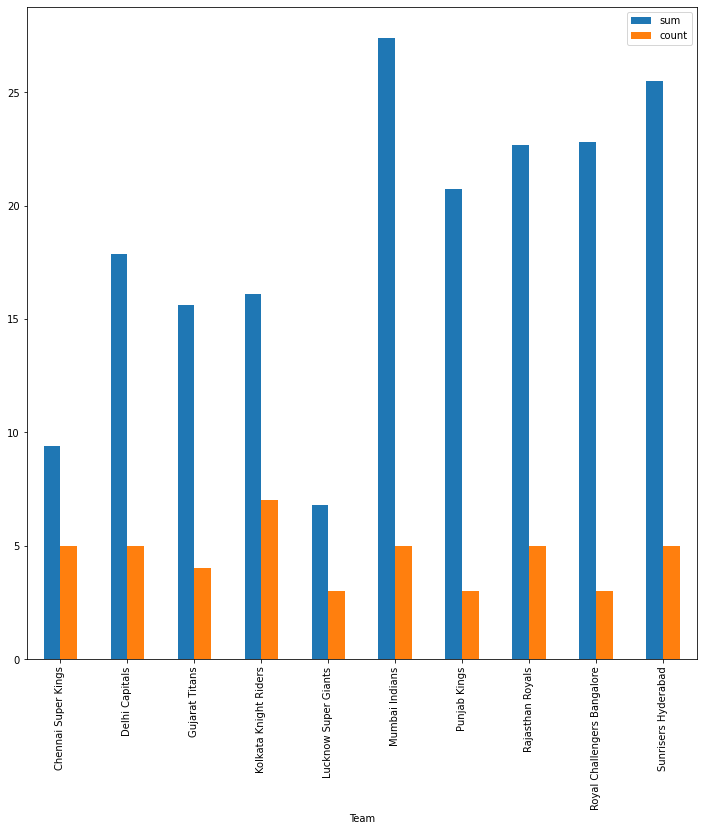

In [36]:
BT.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind = 'bar')

In [37]:
#Observation
# 1) Maximum batters are bought by Kolkata Knight Riders
# 2)Maximum money spent on batters is by Mumbai Indians that is 27.40 cr

Bowlers


In [38]:
BW = P1.loc[P1['TYPE']=='BOWLER']

In [174]:
BW['COST IN ₹ (CR.)'].sum()

236.35

In [176]:
BW['COST IN ₹ (CR.)'].mean()

3.0694805194805195

In [177]:
BW['COST IN ₹ (CR.)'].std()

3.647251631493405

In [39]:
BW.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
Team,,
Chennai Super Kings,18.60,8
Delhi Capitals,31.20,7
Gujarat Titans,40.65,8
Kolkata Knight Riders,12.25,5
Lucknow Super Giants,24.90,8
Mumbai Indians,18.35,7
Punjab Kings,22.20,8
Rajasthan Royals,30.75,10
Royal Challengers Bangalore,17.20,7


<AxesSubplot: xlabel='Team'>

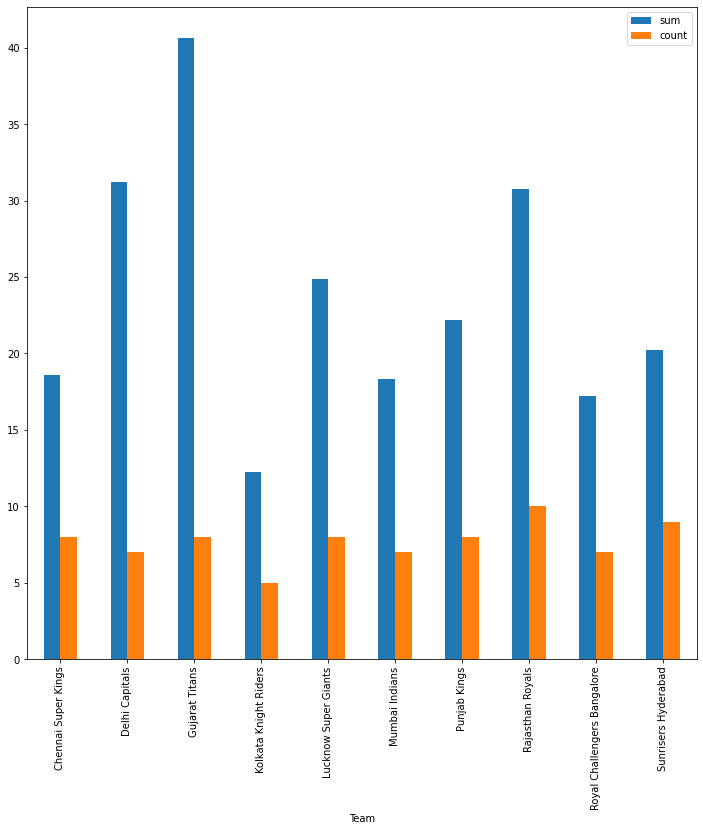

In [40]:
BW.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind = 'bar')

In [41]:
#Observation
#a)Maximum bowlers are bought by Rajasthan Royals
#b)Maximum money is spwnt on bowlers is 40.65 cr by Gujarat Titans.

Wicket Keeper


In [42]:
WK = P1.loc[P1['TYPE']=='WICKETKEEPER']

In [179]:
WK['COST IN ₹ (CR.)'].sum()

137.35

In [181]:
WK['COST IN ₹ (CR.)'].mean()

5.087037037037037

In [182]:
WK['COST IN ₹ (CR.)'].std()

5.663642355352669

In [43]:
WK.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
Team,,
Chennai Super Kings,18.95,3
Delhi Capitals,18.50,3
Gujarat Titans,4.30,2
Kolkata Knight Riders,2.80,3
Lucknow Super Giants,23.75,2
Mumbai Indians,15.45,2
Punjab Kings,7.55,3
Rajasthan Royals,24.20,3
Royal Challengers Bangalore,9.10,3


<AxesSubplot: xlabel='Team'>

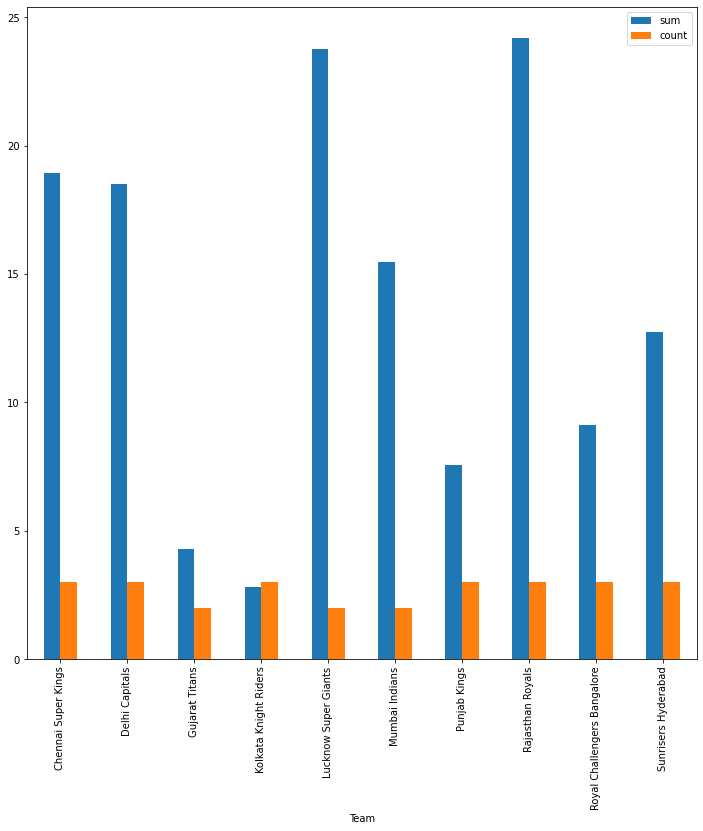

In [44]:
WK.groupby('Team')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind = 'bar')

In [45]:
#Observation
#a)All the teams have 2-3 wicket keepers
#b)Maximum money spent on Wiket - Keepers is by Rajasthan Royals.

Economy


In [46]:
df['COST IN ₹ (CR.)'].sum()

875.9000000000001

In [47]:
BP = df.loc[df['Base Price']!='Retained']
BP1 = BP.loc[BP['Base Price']!='Draft Pick']
BP1['Base Price'].max()
# BW = P1.loc[P1['TYPE']=='BOWLER']

'75 Lakh'

In [48]:
df['COST IN ₹ (CR.)'].max()

17.0

In [49]:
df['COST IN ₹ (CR.)'].mean()

3.6957805907173

In [50]:
df['COST IN ₹ (CR.)'].std()

4.238091881863017

In [51]:
#OBSERVATION
#1)Total money spent in this auction by teams was a sum of 875.9 cr
#2)Maximum money spent among all players is 17 cr
#3)Mean of all money spent in is 3.695 cr
#4)Standard deviation is 4.23 cr.

<BarContainer object of 633 artists>

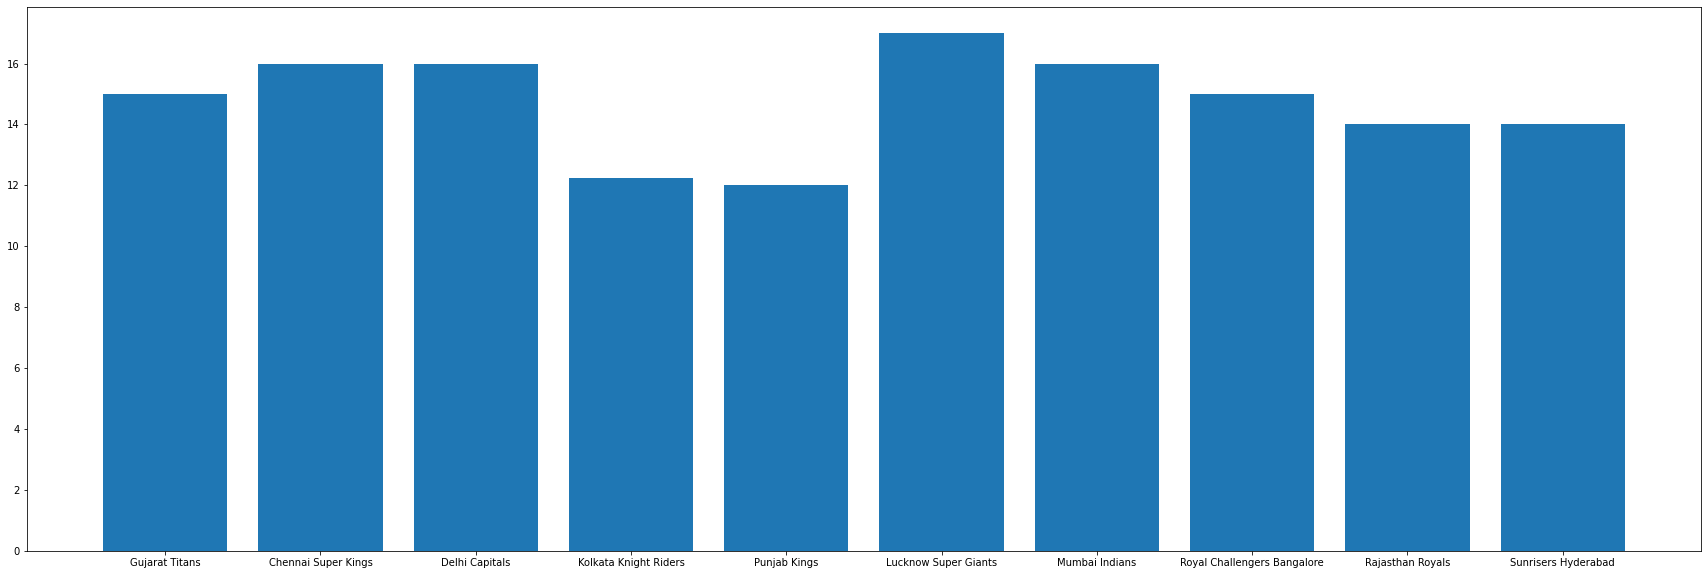

In [52]:
plt.rcParams['figure.figsize'] = (30,10)
plt.bar(x = df['Team'],height = df['COST IN ₹ (CR.)'])

In [53]:
#OBSERVATION
#The above figure shows that maximum money is spent by Lucknow Super Giants with 22 players and minimum by Punjab Kings with 25 players.
#Minimum money is spent by Pujab Kings 

Chennai Super Kings

In [54]:

CSK = df.loc[df['Team']=='Chennai Super Kings']
CSK

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
24,24,MS Dhoni,Retained,WICKETKEEPER,12.00,1560.0,CSK,Chennai Super Kings
25,25,Moeen Ali,Retained,ALL-ROUNDER,8.00,1040.0,CSK,Chennai Super Kings
26,26,Ambati Rayudu,2 Cr,WICKETKEEPER,6.75,877.5,CSK,Chennai Super Kings
27,27,Ruturaj Gaikwad,Retained,BATTER,6.00,780.0,CSK,Chennai Super Kings
28,28,Dwayne Bravo,2 Cr,ALL-ROUNDER,4.40,572.0,CSK,Chennai Super Kings
29,29,Shivam Dube,50 Lakh,ALL-ROUNDER,4.00,520.0,RR,Chennai Super Kings
30,30,Chris Jordan,2 Cr,ALL-ROUNDER,3.60,468.0,PBKS,Chennai Super Kings
31,31,Robin Uthappa,2 Cr,BATTER,2.00,260.0,CSK,Chennai Super Kings


In [55]:
CSK['COST IN ₹ (CR.)'].sum()

87.05

In [56]:
CSK['COST IN ₹ (CR.)'].max()

16.0

In [57]:
CSK['COST IN ₹ (CR.)'].mean()

3.4819999999999998

In [58]:
CSK['COST IN ₹ (CR.)'].std()

4.581413537326663

In [59]:
    #Observation
    #a) Total money spent by CSK is 87.05 crores
    #b) Mean of total money spent by CSK is 3.48 crores
    #c) Maximum money spent on player is 16 crores.
    #d) Standard deviation is 4.581 ce in CSK

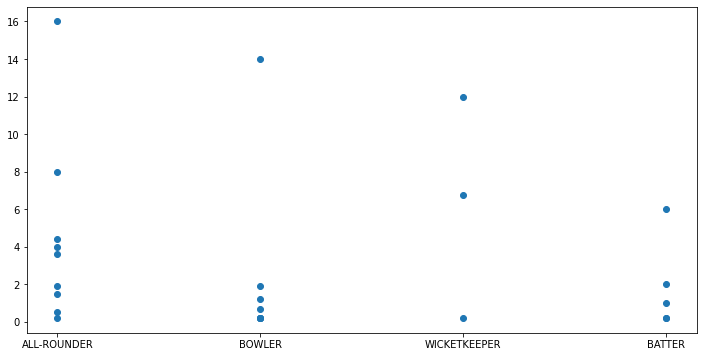

In [60]:
plt.rcParams['figure.figsize'] = (12,6)
plt.scatter(x=CSK['TYPE'],y=CSK['COST IN ₹ (CR.)'])


In [61]:
#OBSERVATION
#a)Total money spent by CSK is 87.05 crores
#b)We can observe scattering between money spent on Types of players from the above figure.
#c)Maximum money among players is spent on an All Rounders.

In [62]:
CSK.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})


,Base Price,Count
0,1 Cr,2
1,1.5 Cr,1
2,2 Cr,5
3,20 Lakh,9
4,30 Lakh,1
5,50 Lakh,3
6,Retained,4


In [63]:

CSK.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,40.10,9
BATTER,9.40,5
BOWLER,18.60,8
WICKETKEEPER,18.95,3


<AxesSubplot: xlabel='TYPE'>

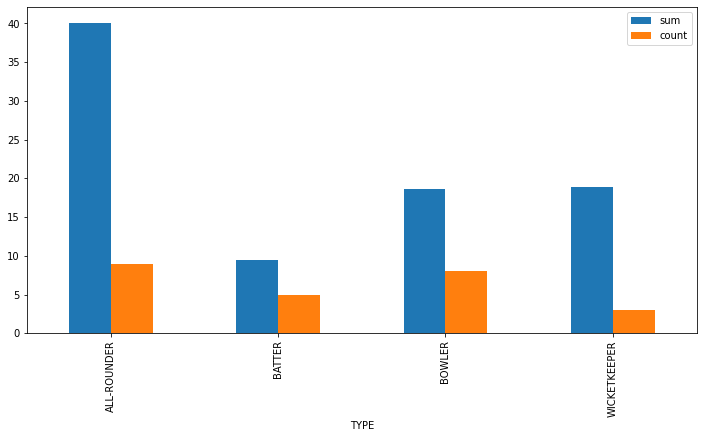

In [64]:
CSK.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [65]:
#OBSERVATIONS
#Chennai Super Kings has
#a)9 All Rounders on whom 40.10 cr is spent
#b)5 Batters on whom 9.40 cr is spent
#c)8 Bowlers on whom 18.60 cr is spent
#d)3 Wicketkeepers on which 18.95 cr is spent
#e)4 players were retained from the last season
#f)We infer that CSK focused mainly on all rounders in the auction.

Delhi Capitals


In [66]:
DC = df.loc[df['Team']=='Delhi Capitals']
DC


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
47,47,Rishabh Pant,Retained,WICKETKEEPER,16.00,2080.0,DC,Delhi Capitals
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals
49,49,Axar Patel,Retained,ALL-ROUNDER,9.00,1170.0,DC,Delhi Capitals
50,50,Prithvi Shaw,Retained,BATTER,7.50,975.0,DC,Delhi Capitals
51,51,Mitchell Marsh,2 Cr,ALL-ROUNDER,6.50,845.0,NaN,Delhi Capitals
52,52,Anrich Nortje,Retained,BOWLER,6.50,845.0,DC,Delhi Capitals
53,53,David Warner,2 Cr,BATTER,6.25,812.5,SRH,Delhi Capitals
54,54,Syed Khaleel Ahmed,50 Lakh,BOWLER,5.25,682.5,SRH,Delhi Capitals
55,55,Chetan Sakariya,50 Lakh,BOWLER,4.20,546.0,RR,Delhi Capitals
56,56,Rovman Powell,75 Lakh,BATTER,2.80,364.0,NaN,Delhi Capitals


In [183]:
DC.count()

Unnamed: 0         24
Player             24
Base Price         24
TYPE               24
COST IN ₹ (CR.)    24
Cost IN $ (000)    24
2021 Squad         19
Team               24
dtype: int64

In [67]:
DC['COST IN ₹ (CR.)'].sum()

86.4

In [68]:
DC['COST IN ₹ (CR.)'].mean()

3.6

In [69]:
DC['COST IN ₹ (CR.)'].max()

16.0

In [70]:
DC['COST IN ₹ (CR.)'].std()

4.1198353702861565

In [71]:
#Observations
#a)Total money spent by Delhi Capitals is 86.4 crores
#b)avergae money spent by Delhi Capitals is 3.6 crores
#c)maximum money spent on a player is 16 crores
#d)standard deviation of money spent in this team is 4.11 cr

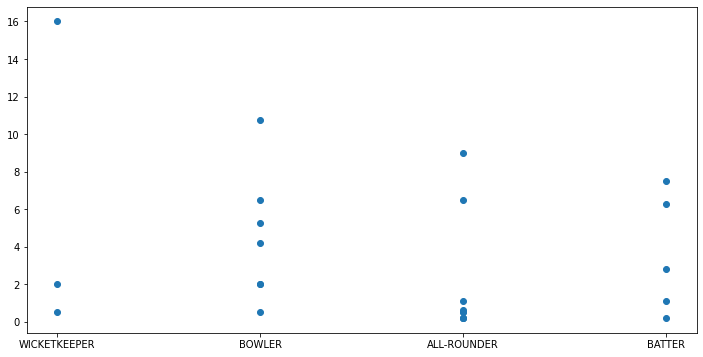

In [72]:
plt.rcParams['figure.figsize'] = (12,6)
plt.scatter(x=DC['TYPE'],y=DC['COST IN ₹ (CR.)'])


In [73]:
DC.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})



,Base Price,Count
0,1 Cr,1
1,2 Cr,4
2,20 Lakh,8
3,40 Lakh,1
4,50 Lakh,5
5,75 Lakh,1
6,Retained,4


In [74]:

PMDC = DC.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])
PMDC

,sum,count
TYPE,,
ALL-ROUNDER,18.85,9
BATTER,17.85,5
BOWLER,31.20,7
WICKETKEEPER,18.50,3


<AxesSubplot: xlabel='TYPE'>

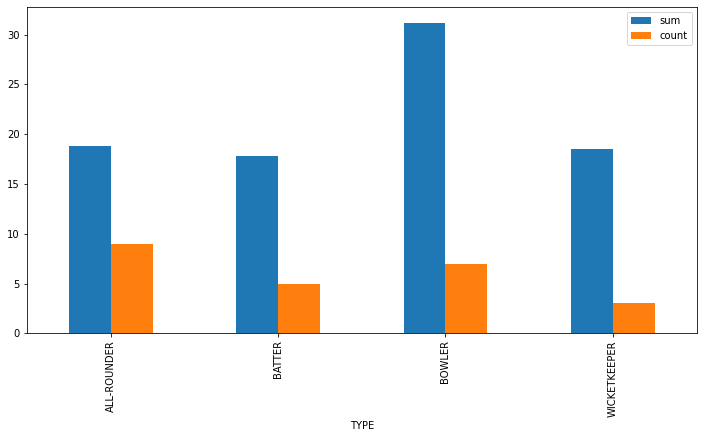

In [75]:
DC.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [76]:
#Observation
#Delhi Capitals has
#a)9 All Rounders on whom 18.85 cr is spent
#b)5 Batters on whom 17.85 cr is spent
#c)7 Bowlers on whom 31.20 cr is spent which is the maximum.
#d)3 Wicketkeepers on whom 18.50 is spent
#e)4 players were retained from the last season
#f)We infer that DC focused mainly on bowlers in the auction.

Gujarat Titans

In [77]:
GT = df.loc[df['Team']=='Gujarat Titans']
GT


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
5,5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans
6,6,Yash Dayal,20 Lakh,BOWLER,3.20,416.0,NaN,Gujarat Titans
7,7,David Miller,1 Cr,BATTER,3.00,390.0,RR,Gujarat Titans
8,8,R. Sai Kishore,20 Lakh,BOWLER,3.00,390.0,CSK,Gujarat Titans
9,9,Abhinav Sadarangani,20 Lakh,BATTER,2.60,338.0,NaN,Gujarat Titans


In [184]:
GT.count()

Unnamed: 0         22
Player             22
Base Price         22
TYPE               22
COST IN ₹ (CR.)    22
Cost IN $ (000)    22
2021 Squad         15
Team               22
dtype: int64

In [78]:
GT['COST IN ₹ (CR.)'].sum()

89.65

In [79]:
GT['COST IN ₹ (CR.)'].max()

15.0

In [80]:
GT['COST IN ₹ (CR.)'].mean()

4.075

In [81]:
GT['COST IN ₹ (CR.)'].std()

4.522950733020793

In [82]:
#Observation
#a) Total money spent by GT is 89.65 crores
#b) Mean of total money spent by GT is 4.075 crores
#c) Maximum money spent on player is 15 crores.
#d) Standard deviation is 4.522 ce in GT

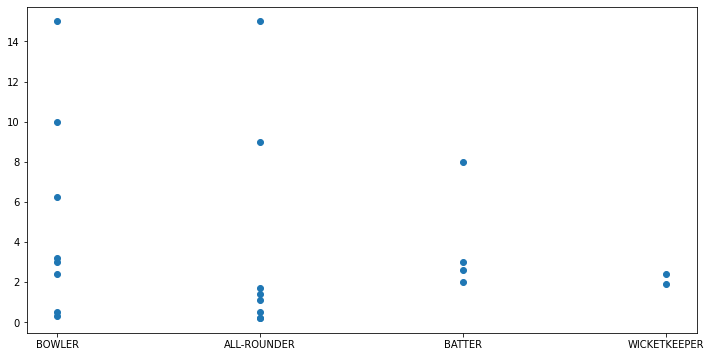

In [83]:
plt.scatter(x=GT['TYPE'],y=GT['COST IN ₹ (CR.)'])

In [84]:
GT.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,3
1,2 Cr,4
2,20 Lakh,5
3,30 Lakh,1
4,40 Lakh,1
5,50 Lakh,3
6,75 Lakh,2
7,Draft Pick,3


In [85]:
GT.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,29.10,8
BATTER,15.60,4
BOWLER,40.65,8
WICKETKEEPER,4.30,2


<AxesSubplot: xlabel='TYPE'>

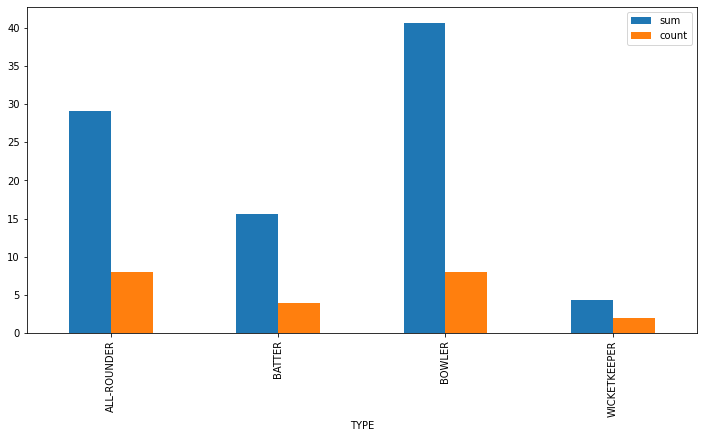

In [86]:
GT.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [87]:
#OBSERVATIONS
# GT has
#a)8 All Rounders on whom 29.10 cr is spent
#b)4 Batters on whom 15.60 cr is spent
#c)8 Bowlers on whom 40.65 cr is spent which is the maximum.
#d)2 Wicketkeepers on whom 4.30 cr is spent
#e)3 players were draft picked from the last season
#f)We infer that GT focused mainly on bowlers in the auction.


Kolkata Knight Riders

In [88]:
KKR = df.loc[df['Team']=='Kolkata Knight Riders']
KKR


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
71,71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders
72,72,Andre Russell,Retained,ALL-ROUNDER,12.00,1560.0,KKR,Kolkata Knight Riders
73,73,Nitish Rana,1 Cr,ALL-ROUNDER,8.00,1040.0,KKR,Kolkata Knight Riders
74,74,Venkatesh Iyer,Retained,ALL-ROUNDER,8.00,1040.0,KKR,Kolkata Knight Riders
75,75,Varun Chakaravarthy,Retained,BOWLER,8.00,1040.0,KKR,Kolkata Knight Riders
76,76,Pat Cummins,2 Cr,ALL-ROUNDER,7.25,942.5,KKR,Kolkata Knight Riders
77,77,Shivam Mavi,40 Lakh,ALL-ROUNDER,7.25,942.5,KKR,Kolkata Knight Riders
78,78,Sunil Narine,Retained,ALL-ROUNDER,6.00,780.0,KKR,Kolkata Knight Riders
79,79,Sam Billings,2 Cr,WICKETKEEPER,2.00,260.0,DC,Kolkata Knight Riders
80,80,Umesh Yadav,2 Cr,BOWLER,2.00,260.0,DC,Kolkata Knight Riders


In [185]:
KKR.count()

Unnamed: 0         25
Player             25
Base Price         25
TYPE               25
COST IN ₹ (CR.)    25
Cost IN $ (000)    25
2021 Squad         15
Team               25
dtype: int64

In [89]:
KKR['COST IN ₹ (CR.)'].sum()

81.55

In [90]:
KKR['COST IN ₹ (CR.)'].mean()

3.262

In [91]:
KKR['COST IN ₹ (CR.)'].max()

12.25

In [92]:
KKR['COST IN ₹ (CR.)'].std()

3.964879149062007

In [93]:
#Observation
#a) Total money spent by KKR is 81.55 crores
#b) Mean of total money spent by KKR is 3.262 crores
#c) Maximum money spent on player is 12.25 crores.
#d) Standard deviation is 3.96 cr in KKR

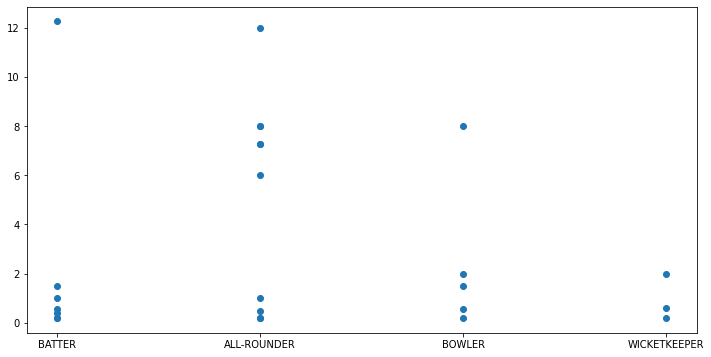

In [94]:
plt.scatter(x=KKR['TYPE'],y=KKR['COST IN ₹ (CR.)'])

In [95]:
KKR.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,3
1,1.5 Cr,2
2,2 Cr,4
3,20 Lakh,9
4,30 Lakh,1
5,40 Lakh,1
6,50 Lakh,1
7,Retained,4


In [96]:
KKR.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,50.40,10
BATTER,16.10,7
BOWLER,12.25,5
WICKETKEEPER,2.80,3


<AxesSubplot: xlabel='TYPE'>

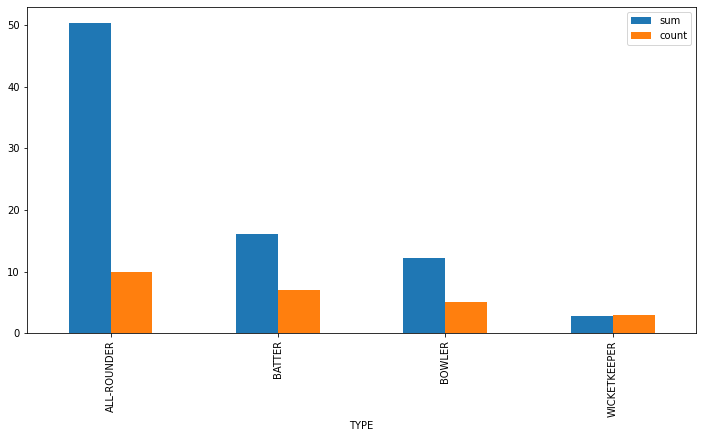

In [97]:
KKR.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [98]:
#OBSERVATIONS
# KKR has
#a)10 All Rounders on whom 50.40 cr is spent
#b)7 Batters on whom 16.10 cr is spent
#c)5 Bowlers on whom 12.25 cr is spent
#d)3 Wicketkeepers on which 2.80 cr is spent
#e)4 players were retained from the last season
#f)We infer that KKR focused mainly on all rounders in the auction.

Punjab Kings

In [99]:
PK = df.loc[df['Team']=='Punjab Kings']
PK


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings
99,99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings
101,101,Jonny Bairstow,1.5 Cr,WICKETKEEPER,6.75,877.5,SRH,Punjab Kings
102,102,Odean Smith,1 Cr,ALL-ROUNDER,6.00,780.0,NaN,Punjab Kings
103,103,Rahul Chahar,75 Lakh,BOWLER,5.25,682.5,MI,Punjab Kings
104,104,Arshdeep Singh,Retained,BOWLER,4.00,520.0,PBKS,Punjab Kings
105,105,Harpreet Brar,20 Lakh,ALL-ROUNDER,3.80,494.0,PBKS,Punjab Kings


In [186]:
PK.count()

Unnamed: 0         25
Player             25
Base Price         25
TYPE               25
COST IN ₹ (CR.)    25
Cost IN $ (000)    25
2021 Squad         14
Team               25
dtype: int64

In [100]:
PK['COST IN ₹ (CR.)'].sum()

84.55000000000001

In [101]:
PK['COST IN ₹ (CR.)'].mean()

3.3820000000000006

In [102]:
PK['COST IN ₹ (CR.)'].max()

12.0

In [103]:
PK['COST IN ₹ (CR.)'].std()

3.9511570035455015

In [104]:
#Observation
#a) Total money spent by PK is 87.55 crores
#b) Mean of total money spent by KKR is 3.38 crores
#c) Maximum money spent on player is 12.0 crores.
#d) Standard deviation is 3.95 cr in CSK

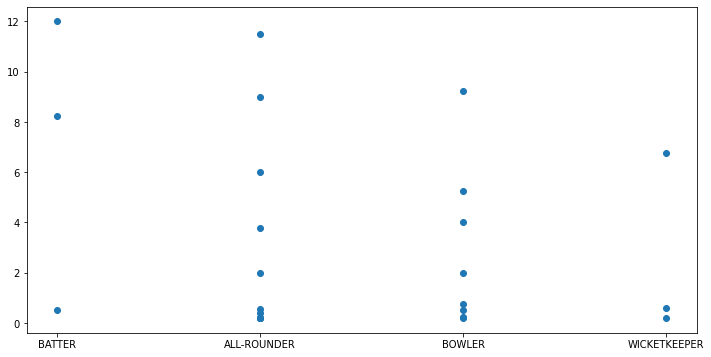

In [105]:
plt.scatter(x=PK['TYPE'],y=PK['COST IN ₹ (CR.)'])

In [106]:
PK.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,2
1,1.5 Cr,1
2,2 Cr,2
3,20 Lakh,11
4,40 Lakh,2
5,50 Lakh,3
6,75 Lakh,2
7,Retained,2


In [107]:
PK.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,34.05,11
BATTER,20.75,3
BOWLER,22.20,8
WICKETKEEPER,7.55,3


<AxesSubplot: xlabel='TYPE'>

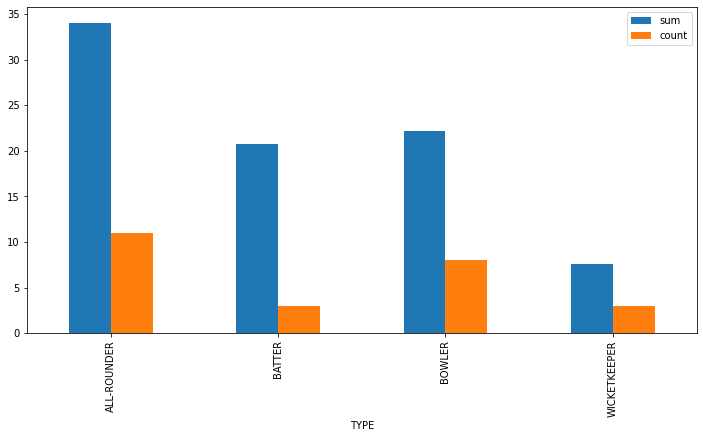

In [108]:
PK.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [109]:
#OBSERVATIONS
# PK has
#a)11 All Rounders on whom 34.05 cr is spent which is the maximum .
#b)3 Batters on whom 20.75 cr is spent
#c)8 Bowlers on whom 22.20 cr is spent
#d)3 Wicketkeepers on which 7.55 cr is spent
#e)2 players were retained from the last season
#f)We infer that PK focused mainly on all rounders in the auction.

Mumbai Indians

In [110]:
MI = df.loc[df['Team']=='Mumbai Indians']
MI


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
143,143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
144,144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians
145,145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians
146,146,Tim David,40 Lakh,ALL-ROUNDER,8.25,1072.5,RCB,Mumbai Indians
147,147,Jofra Archer,2 Cr,ALL-ROUNDER,8.00,1040.0,RR,Mumbai Indians
148,148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians
149,149,Kieron Pollard,Retained,ALL-ROUNDER,6.00,780.0,MI,Mumbai Indians
150,150,Dewald Brevis,20 Lakh,BATTER,3.00,390.0,NaN,Mumbai Indians
151,151,Daniel Sams,1 Cr,ALL-ROUNDER,2.60,338.0,RCB,Mumbai Indians
152,152,N. Tilak Varma,20 Lakh,ALL-ROUNDER,1.70,221.0,NaN,Mumbai Indians


In [187]:
MI.count()

Unnamed: 0         25
Player             25
Base Price         25
TYPE               25
COST IN ₹ (CR.)    25
Cost IN $ (000)    25
2021 Squad         15
Team               25
dtype: int64

In [111]:
MI['COST IN ₹ (CR.)'].sum()

89.9

In [112]:
MI['COST IN ₹ (CR.)'].mean()

3.596

In [113]:
MI['COST IN ₹ (CR.)'].max()

16.0

In [114]:
MI['COST IN ₹ (CR.)'].std()

4.869760432163647

In [115]:
#Observation
#a) Total money spent by MI is 89.9 crores
#b) Mean of total money spent by MI is 3.59 crores
#c) Maximum money spent on player is 16 crores.
#d) Standard deviation is 4.86 ce in MI

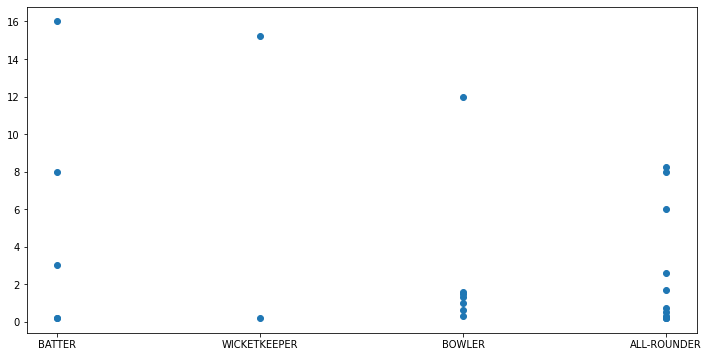

In [116]:
plt.scatter(x=MI['TYPE'],y=MI['COST IN ₹ (CR.)'])

In [117]:
MI.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,3
1,2 Cr,2
2,20 Lakh,11
3,30 Lakh,1
4,40 Lakh,1
5,50 Lakh,1
6,75 Lakh,2
7,Retained,4


In [118]:
MI.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,28.70,11
BATTER,27.40,5
BOWLER,18.35,7
WICKETKEEPER,15.45,2


<AxesSubplot: xlabel='TYPE'>

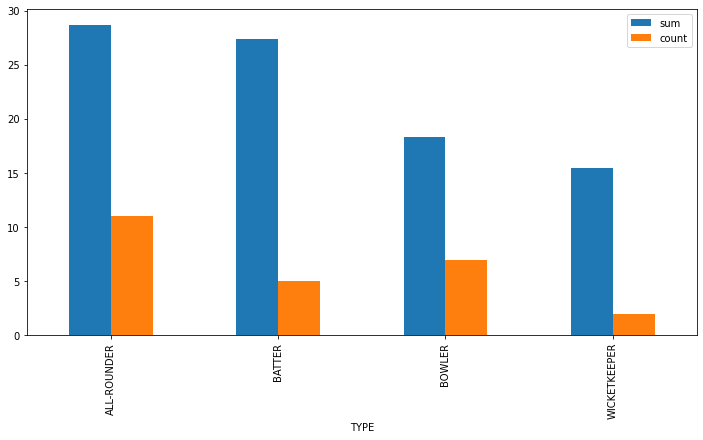

In [119]:
MI.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [120]:
#OBSERVATIONS
# MI has
#a)11 All Rounders on whom 28.70 cr is spent
#b)5 Batters on whom 27.40 cr is spent
#c)7 Bowlers on whom 18.35 cr is spent
#d)2 Wicketkeepers on which 15.45 cr is spent
#e)4 players were retained from the last season
#f)We infer that MI focused mainly on all rounders and batters in the auction.

Rajasthan Royals

In [121]:
RR = df.loc[df['Team']=='Rajasthan Royals']
RR


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
190,190,Sanju Samson,Retained,WICKETKEEPER,14.00,1820.0,RR,Rajasthan Royals
191,191,Jos Buttler,Retained,WICKETKEEPER,10.00,1300.0,RR,Rajasthan Royals
192,192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals
193,193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals
194,194,Trent Boult,2 Cr,BOWLER,8.00,1040.0,MI,Rajasthan Royals
195,195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals
196,196,Yuzvendra Chahal,2 Cr,BOWLER,6.50,845.0,RCB,Rajasthan Royals
197,197,R. Ashwin,2 Cr,ALL-ROUNDER,5.00,650.0,DC,Rajasthan Royals
198,198,Yashaswi Jaiswal,Retained,BATTER,4.00,520.0,RR,Rajasthan Royals
199,199,Riyan Parag,30 Lakh,ALL-ROUNDER,3.80,494.0,RR,Rajasthan Royals


In [188]:
RR.count()

Unnamed: 0         24
Player             24
Base Price         24
TYPE               24
COST IN ₹ (CR.)    24
Cost IN $ (000)    24
2021 Squad         16
Team               24
dtype: int64

In [122]:
RR['COST IN ₹ (CR.)'].sum()

89.05

In [123]:
RR['COST IN ₹ (CR.)'].mean()

3.7104166666666667

In [124]:
RR['COST IN ₹ (CR.)'].max()

14.0

In [125]:
RR['COST IN ₹ (CR.)'].std()

4.048697567459642

In [126]:
#Observation
#a) Total money spent by RR is 89.05 crores
#b) Mean of total money spent by RR is 3.71 crores
#c) Maximum money spent on player is 14 crores.
#d) Standard deviation is 4.04 ce in RR

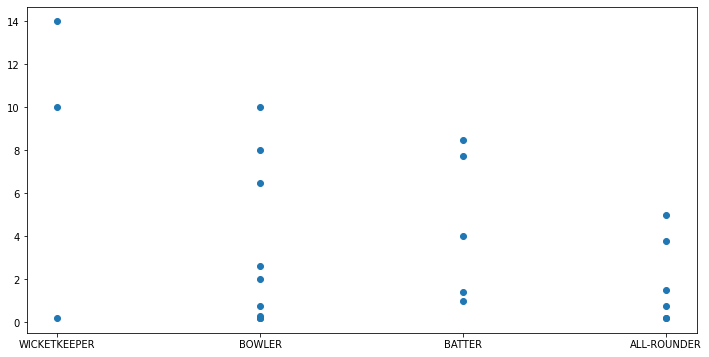

In [127]:
plt.scatter(x=RR['TYPE'],y=RR['COST IN ₹ (CR.)'])

In [128]:
RR.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,2
1,1.5 Cr,2
2,2 Cr,5
3,20 Lakh,7
4,30 Lakh,1
5,50 Lakh,1
6,75 Lakh,3
7,Retained,3


In [129]:
RR.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,11.45,6
BATTER,22.65,5
BOWLER,30.75,10
WICKETKEEPER,24.20,3


<AxesSubplot: xlabel='TYPE'>

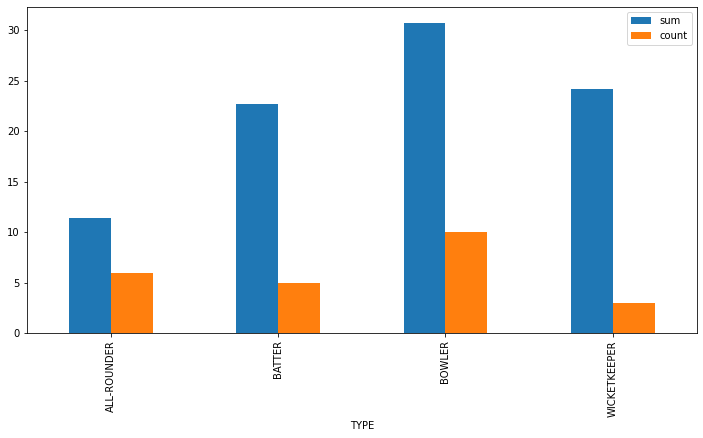

In [130]:
RR.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [131]:
#OBSERVATIONS
# RR has
#a)5 All Rounders on whom 11.45 cr is spent
#b)5 Batters on whom 22.65 cr is spent
#c)10 Bowlers on whom 30.75 cr is spent
#d)3 Wicketkeepers on which 24.20 cr is spent
#e)3 players were retained from the last season
#f)We infer that RR focused mainly on bowlers in the auction.

Sunrisers Hyderabad

In [132]:
SRH = df.loc[df['Team']=='Sunrisers Hyderabad']
SRH


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
214,214,Kane Williamson,Retained,BATTER,14.00,1820.0,SRH,Sunrisers Hyderabad
215,215,Nicholas Pooran,1.5 Cr,WICKETKEEPER,10.75,1397.5,PBKS,Sunrisers Hyderabad
216,216,Washington Sundar,1.5 Cr,ALL-ROUNDER,8.75,1137.5,RCB,Sunrisers Hyderabad
217,217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad
218,218,Romario Shepherd,75 Lakh,ALL-ROUNDER,7.75,1007.5,NaN,Sunrisers Hyderabad
219,219,Abhishek Sharma,20 Lakh,ALL-ROUNDER,6.50,845.0,SRH,Sunrisers Hyderabad
220,220,Marco Jansen,50 Lakh,ALL-ROUNDER,4.20,546.0,MI,Sunrisers Hyderabad
221,221,Bhuvneshwar Kumar,2 Cr,BOWLER,4.20,546.0,SRH,Sunrisers Hyderabad
222,222,T. Natarajan,1 Cr,BOWLER,4.00,520.0,SRH,Sunrisers Hyderabad
223,223,Abdul Samad,Retained,ALL-ROUNDER,4.00,520.0,SRH,Sunrisers Hyderabad


In [189]:
SRH.count()

Unnamed: 0         23
Player             23
Base Price         23
TYPE               23
COST IN ₹ (CR.)    23
Cost IN $ (000)    23
2021 Squad         17
Team               23
dtype: int64

In [133]:
SRH['COST IN ₹ (CR.)'].sum()

89.90000000000002

In [134]:
SRH['COST IN ₹ (CR.)'].mean()

3.908695652173914

In [135]:
SRH['COST IN ₹ (CR.)'].max()

14.0

In [136]:
SRH['COST IN ₹ (CR.)'].std()


3.8530286839739065

In [137]:
#Observation
#a) Total money spent by SRH is 89.90 crores
#b) Mean of total money spent by SRH is 3.90 crores
#c) Maximum money spent on player is 14 crores.
#d) Standard deviation is 3.853 ce in SRH

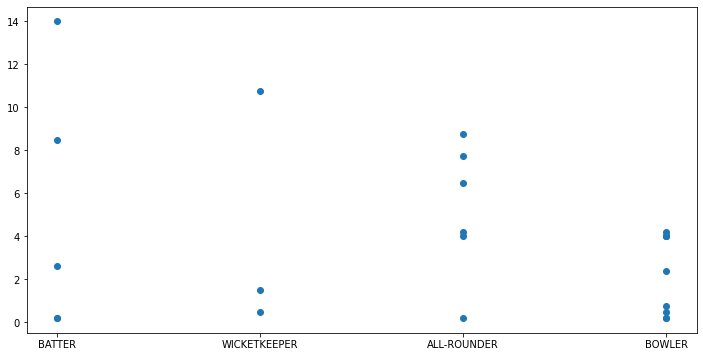

In [138]:
plt.scatter(x=SRH['TYPE'],y=SRH['COST IN ₹ (CR.)'])

In [139]:
SRH.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,2
1,1.5 Cr,3
2,2 Cr,1
3,20 Lakh,9
4,40 Lakh,1
5,50 Lakh,2
6,75 Lakh,2
7,Retained,3


In [140]:
SRH.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,31.40,6
BATTER,25.50,5
BOWLER,20.25,9
WICKETKEEPER,12.75,3


<AxesSubplot: xlabel='TYPE'>

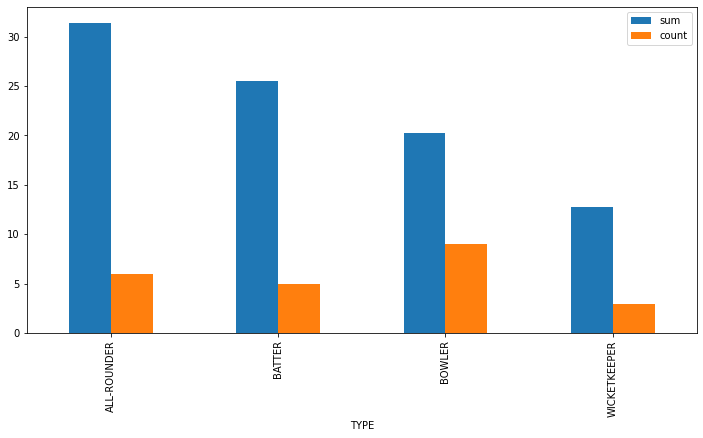

In [141]:
SRH.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [142]:
#OBSERVATIONS
#SRH has
#a)6 All Rounders on whom 31.40 cr is spent
#b)5 Batters on whom 25.50 cr is spent
#c)9 Bowlers on whom 20.25 cr is spent
#d)3 Wicketkeepers on which 12.75 cr is spent
#e)3 players were retained from the last season
#f)We infer that SRH focused mainly on all rounders in the auction.

Lucknow Super Giants

In [143]:
LSG = df.loc[df['Team']=='Lucknow Super Giants']
LSG


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
121,121,KL Rahul,Draft Pick,WICKETKEEPER,17.00,2210.0,PBKS,Lucknow Super Giants
122,122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants
123,123,Marcus Stoinis,Draft Pick,ALL-ROUNDER,9.20,1196.0,DC,Lucknow Super Giants
124,124,Jason Holder,1.5 Cr,ALL-ROUNDER,8.75,1137.5,SRH,Lucknow Super Giants
125,125,Krunal Pandya,2 Cr,ALL-ROUNDER,8.25,1072.5,MI,Lucknow Super Giants
126,126,Mark Wood,2 Cr,BOWLER,7.50,975.0,NaN,Lucknow Super Giants
127,127,Quinton De Kock,2 Cr,WICKETKEEPER,6.75,877.5,MI,Lucknow Super Giants
128,128,Deepak Hooda,75 Lakh,ALL-ROUNDER,5.75,747.5,PBKS,Lucknow Super Giants
129,129,Manish Pandey,1 Cr,BATTER,4.60,598.0,SRH,Lucknow Super Giants
130,130,Ravi Bishnoi,Draft Pick,BOWLER,4.00,520.0,PBKS,Lucknow Super Giants


In [190]:
LSG.count()

Unnamed: 0         22
Player             22
Base Price         22
TYPE               22
COST IN ₹ (CR.)    22
Cost IN $ (000)    22
2021 Squad         14
Team               22
dtype: int64

In [144]:
LSG['COST IN ₹ (CR.)'].sum()

89.4

In [145]:
LSG['COST IN ₹ (CR.)'].max()

17.0

In [146]:
LSG['COST IN ₹ (CR.)'].mean()

4.0636363636363635

In [147]:
LSG['COST IN ₹ (CR.)'].std()

4.560758651860398

In [148]:
#Observation
#a) Total money spent by LSG is 89.4 crores
#b) Mean of total money spent by LSG is 4.06 crores
#c) Maximum money spent on player is 17 crores.
#d) Standard deviation is 4.56 cr in LSG

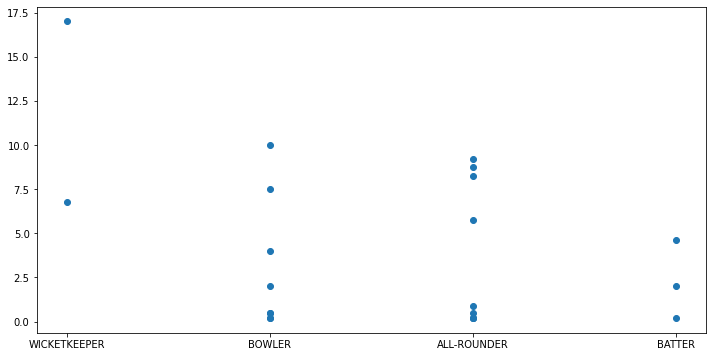

In [149]:
plt.scatter(x=LSG['TYPE'],y=LSG['COST IN ₹ (CR.)'])

In [150]:
LSG.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,1
1,1.5 Cr,1
2,2 Cr,4
3,20 Lakh,8
4,50 Lakh,4
5,75 Lakh,1
6,Draft Pick,3


In [151]:
LSG.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count'])

,sum,count
TYPE,,
ALL-ROUNDER,33.95,9
BATTER,6.80,3
BOWLER,24.90,8
WICKETKEEPER,23.75,2


<AxesSubplot: xlabel='TYPE'>

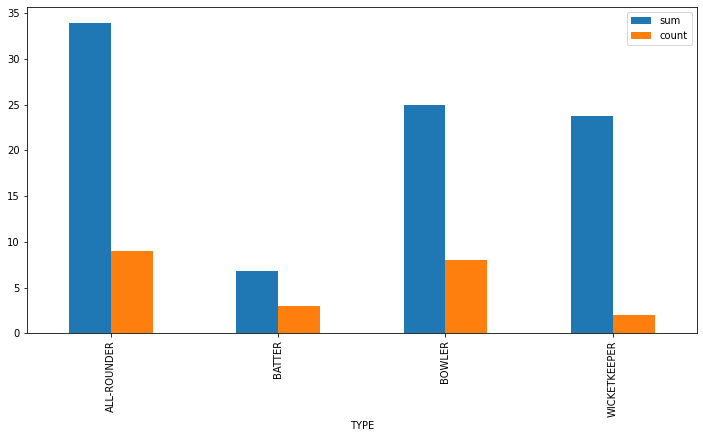

In [152]:
LSG.groupby('TYPE')['COST IN ₹ (CR.)'].agg(['sum','count']).plot(kind='bar')

In [153]:
#OBSERVATIONS
#LSG has
#a)9 All Rounders on whom 33.95 cr is spent
#b)3 Batters on whom 6.80 cr is spent
#c)8 Bowlers on whom 24.90 cr is spent
#d)2 Wicketkeepers on which 23.75 cr is spent
#e)3 players were draft picked.
#f)We infer that LSG focused mainly on all rounders in the auction.

UNSOLD


In [154]:
US = df.loc[df['Team']=='Unsold']
US


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [155]:
US.groupby('Base Price').size().reset_index().rename(columns={0:'Count'})

,Base Price,Count
0,1 Cr,12
1,1.5 Cr,10
2,2 Cr,12
3,20 Lakh,261
4,30 Lakh,3
5,40 Lakh,8
6,50 Lakh,79
7,75 Lakh,11


In [156]:
PUS  = US.groupby('2021 Squad').size().reset_index().rename(columns={0:'Count'})
PUS

,2021 Squad,Count
0,CSK,3
1,DC,7
2,KKR,5
3,MI,6
4,PBKS,5
5,RCB,7
6,RR,3
7,SRH,4


In [157]:
PUS.sum()

2021 Squad    CSKDCKKRMIPBKSRCBRRSRH
Count                             40
dtype: object

<BarContainer object of 8 artists>

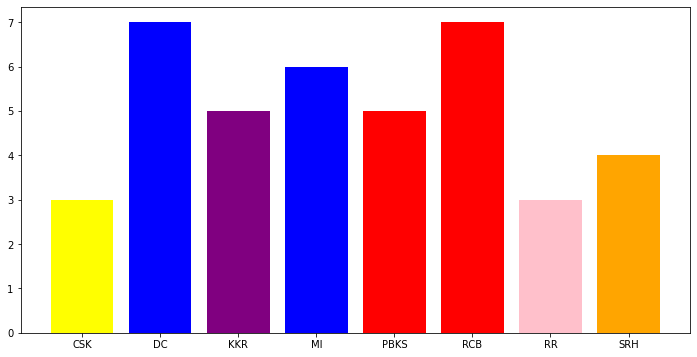

In [158]:
cl = ['yellow','blue','purple','blue','red','red','pink','orange']
plt.bar(x = PUS['2021 Squad'],height = PUS['Count'],color = cl)

In [159]:
#Observation
# 40 players were realsed from teams as follows -
# 1)3 players were released from CSK
# 2)7 players were released from DC
# 3)5 players were released from KKR
# 4)6 players were released from MI
# 5)5 players were released from PBKS
# 6)7 players were released from RCB
# 7)3 players were released from RR
# 8)4 players were released from SRH


In [160]:
PUS1 = US.groupby('TYPE').size().reset_index().rename(columns={0:'Count'})
PUS1

,TYPE,Count
0,ALL-ROUNDER,154
1,BATTER,67
2,BOWLER,138
3,WICKETKEEPER,37


<AxesSubplot: ylabel='TYPE'>

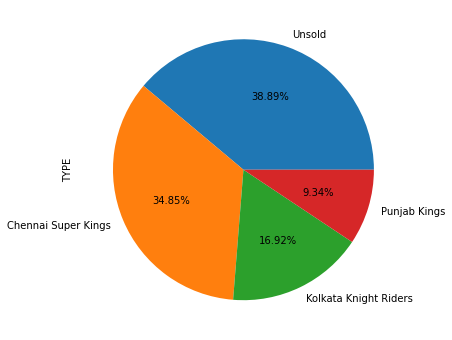

In [161]:
US['TYPE'].value_counts().plot(kind = 'pie', autopct = "%.2f%%",labels = df.Team.value_counts().index)

<BarContainer object of 4 artists>

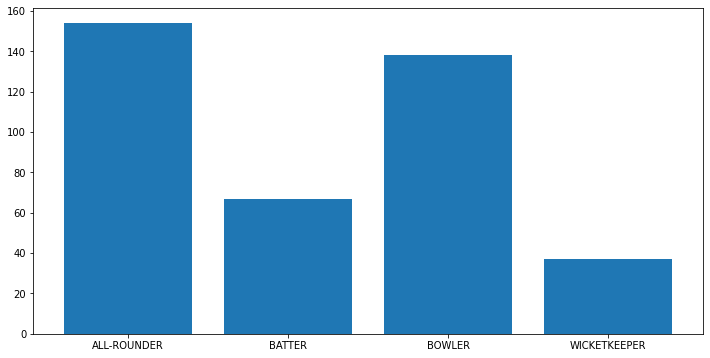

In [162]:
plt.bar(x = PUS1['TYPE'],height=PUS1['Count'])

In [163]:
#Observations
# a) 154 All rounders were Unsold.
# b) 67 Batters were Unsold.
# c) 138 Bowlers were Unsold.
# d) 37 Wicket Keepers were Unsold.